In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set()

In [2]:
#menentukan rataan 2 kelompok
rataan1 = 50
rataan2 = 65

#menentukan dasar deviasi
sd = 5

#ukuran sampel 2 kelompok
sampel1 = 50
sampel2 = 40

In [3]:
#generate bilangan random
test = np.random.randn(sampel1)
test

array([ 0.696997  ,  0.80870961, -0.1057072 , -0.57020046, -0.31691262,
       -0.19715168,  0.73492643,  0.52231508, -1.08759933,  0.79484848,
        0.80935719,  1.15218924, -1.55461728,  0.48216593, -0.05058026,
       -0.15391584,  2.24838371, -0.13772833,  0.33143173, -0.30327397,
        0.08744421, -1.0653288 ,  0.84450595,  2.79632775,  0.34068397,
       -0.20656457,  0.6355141 ,  0.26404604,  0.96157703,  0.18950819,
       -1.44404281,  0.20856888, -0.69616244, -0.52291108, -0.45842128,
       -0.899961  ,  0.878335  ,  0.19827727, -0.61532193, -1.76836289,
       -0.93803834,  1.70748222, -0.52924049,  0.57807847, -0.33499794,
       -0.11287023, -1.634736  ,  1.48137097,  0.82236363,  0.24006024])

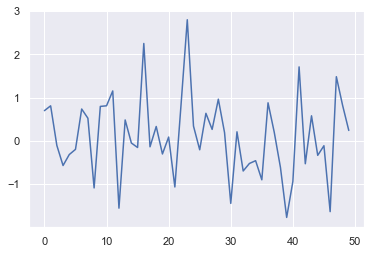

In [4]:
plt.plot(test)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

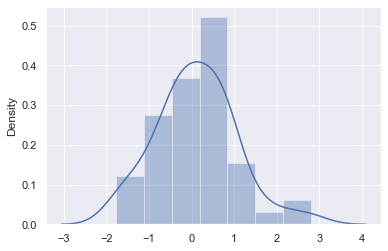

In [5]:
sns.distplot(test)

In [6]:
#generate data
data1 = np.random.randn(sampel1)*sd + rataan1
data2 = np.random.randn(sampel2)*sd + rataan2

#menggabungkan sampel size jumlah data
kelompok_data = [sampel1,sampel2]

batas = [np.min(np.hstack((data1, data2))), np.max(np.hstack((data1, data2)))]

In [7]:
batas

[39.8084950757755, 75.0149991021513]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


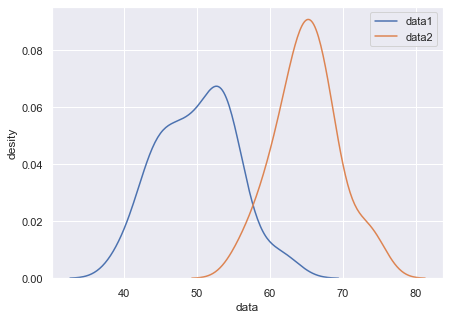

In [8]:
#plot distribusi kedua kelompok (statistik deskriptif)
plt.figure(figsize=(7,5))

a = sns.distplot(data1, hist=False, label='data1')
a = sns.distplot(data2, hist=False, label='data2')

a.set(xlabel='data', ylabel='desity')
plt.legend();

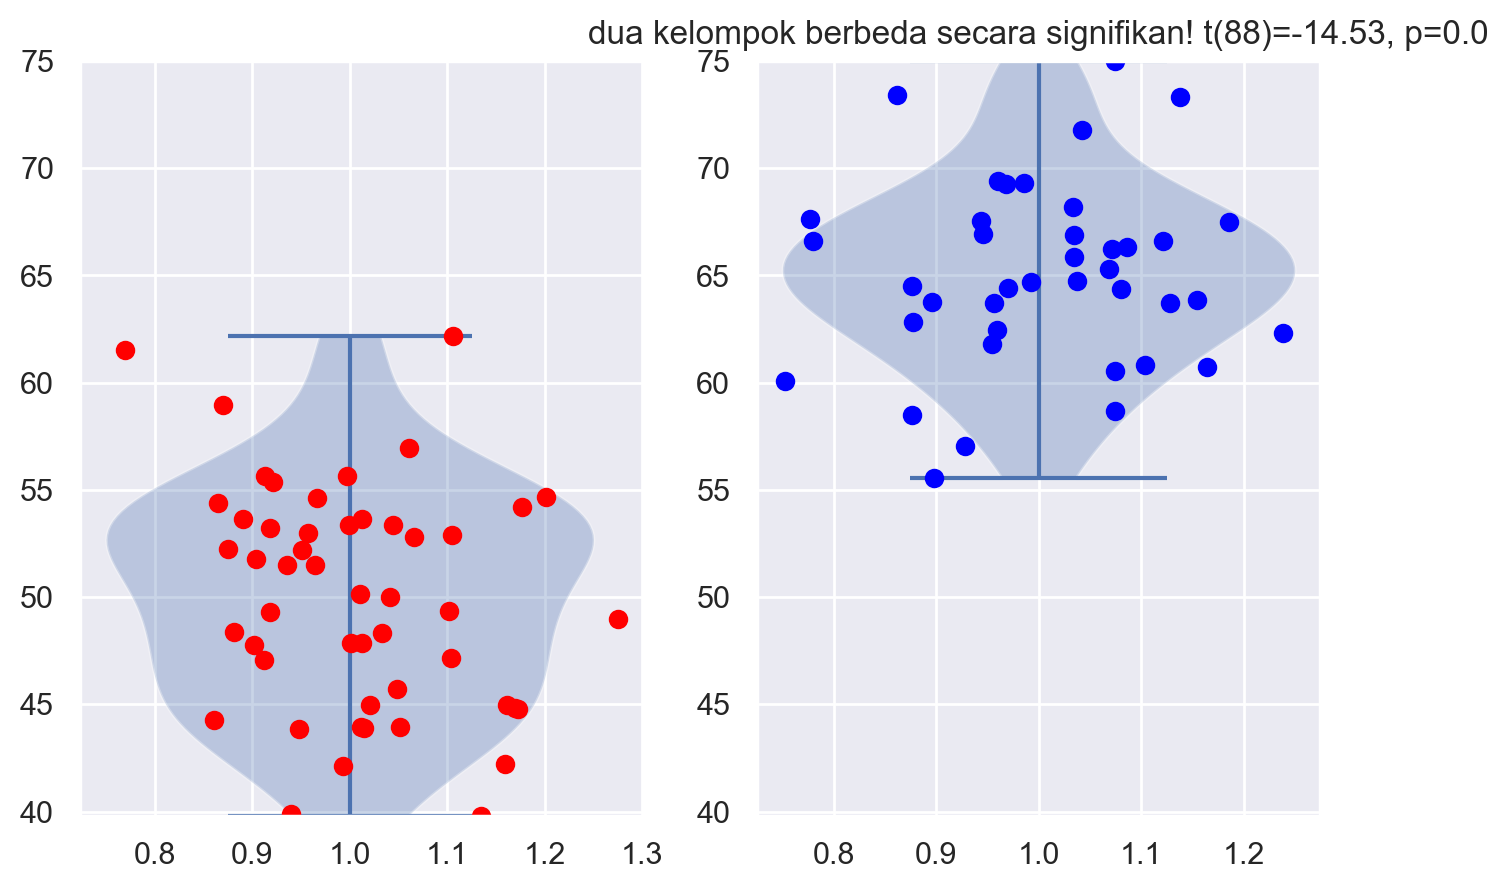

In [9]:
#melakukan uji statistik (statistik inferential)
fig, ax = plt.subplots(1,2, figsize=(8,5), dpi=200)

ax[0].violinplot(data1)
ax[0].plot(1+np.random.randn(sampel1)/10, data1, 'o', color='red')
ax[0].set_ylim(batas)

ax[1].violinplot(data2)
ax[1].plot(1+np.random.randn(sampel2)/10, data2, 'o', color='blue')
ax[1].set_ylim(batas)

#melakukan uji T-Test
t,p = stats.ttest_ind(data1, data2)

#mencetak hasil T_test di judul
sigtxt = ('', 'Tidak')
plt.title('dua kelompok{} berbeda secara signifikan! t({})={}, p={}'.format(sigtxt[int(p>.05)],
                                                                           sum(kelompok_data)-2,
                                                                           np.round(t,2),
                                                                           np.round(p,6)))
plt.show()


In [10]:
p

4.165055968449586e-25